In [6]:
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from FlagEmbedding import BGEM3FlagModel

# 给定了正面和负面数据的示例，也相应的给定了各自的权重，使用线性模型进行了一次回归训练

# 正面和负面的文本例子
pos_texts = [
    "这部电影的剧情和演技让我完全沉浸其中。",
    "我很喜欢这个故事，情感充沛，打动人心。",
    "看完觉得非常温暖，推荐大家观看。",
    "主角的表演令人惊艳，情节引人入胜。",
    "这是一部难得的佳作，让人感动。",
    "导演的叙事手法独特，每个细节都处理得恰到好处。",
    "配乐与画面完美融合，营造出强烈的情感共鸣。",
    "角色塑造立体丰满，故事发展出乎意料又在情理之中。",
    "影片主题深刻，引发观众对人生的深入思考。",
    "摄影构图精美，每一帧都像艺术品。",
    "笑点与泪点并存，情感层次丰富动人。",
    "剧本扎实，台词精炼有力直击心灵。",
    "特效逼真震撼，动作场面设计极具创意。",
    "结尾处理巧妙，给人留下深刻余韵。",
    "年度必看之作，绝对值得二刷三刷。"
]

neg_texts = [
    "剧情毫无亮点，看得很无聊。",
    "浪费时间，完全没有期待中的好。",
    "表演很尴尬，故事也很俗套。",
    "剧情拖沓，结局让人失望。",
    "看完之后非常后悔，不推荐。",
    "导演完全失控，叙事混乱毫无章法。",
    "演员演技生硬，台词念得毫无感情。",
    "逻辑漏洞百出，情节发展莫名其妙。",
    "特效廉价虚假，严重出戏毫无代入感。",
    "配乐与剧情严重脱节，情绪完全被破坏。",
    "人物动机不明，行为前后矛盾难以理解。",
    "剪辑跳跃零碎，观影体验极其糟糕。",
    "主题老套陈腐，毫无新意可言。",
    "节奏把控失败，前半段冗长后半段仓促。",
    "全片充满刻板印象，价值观令人不适。"
]

# 1. 合并文本特征
texts = pos_texts + neg_texts

# 生成标签：正面权重为1，负面权重为0
labels = [1]*len(pos_texts) + [0]*len(neg_texts)

print(f"数据集大小: {len(texts)}")
print(f"标签分布:\n{pd.DataFrame(labels).value_counts()}")
print("标签含义: 0=负面, 1=正面")


# 2. 获取embedding嵌入向量
print("\n加载BGE-m3模型...")
# model = BGEM3FlagModel(model_name_or_path="/mnt/workspace/ai/models/bge-m3", use_fp16=False)
model = SentenceTransformer("/mnt/workspace/ai/models/bge-m3")


print("\n提取文本嵌入特征...")
# embeddings = model.encode(texts, batch_size=5, max_length=128)['dense_vecs']
embeddings = model.encode(texts, show_progress_bar=True)
print(f"嵌入特征形状: {embeddings.shape}")


# --- 3. 直接训练逻辑回归模型 ---
print("\n训练二分类逻辑回归模型...")
clf = LogisticRegression(max_iter=1000) 
X = embeddings
y = labels
clf.fit(X, y)
print("训练完成！")


数据集大小: 30
标签分布:
0
0    15
1    15
Name: count, dtype: int64
标签含义: 0=负面, 1=正面

加载BGE-m3模型...

提取文本嵌入特征...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

嵌入特征形状: (30, 1024)

训练二分类逻辑回归模型...
训练完成！



=== 权重分析 ===
权重矩阵形状: (1, 1024)
特征维度数: 1024
类别数: 1
特征维度数: 1024
最重要维度重要性: 0.334

Top 10 权重贡献维度（按绝对值排序）:
  维度 61: 0.334
  维度 727: 0.333
  维度 474: 0.326
  维度 161: -0.268
  维度 583: -0.263
  维度 786: -0.256
  维度 660: 0.254
  维度 611: -0.247
  维度 319: 0.245
  维度 726: -0.239


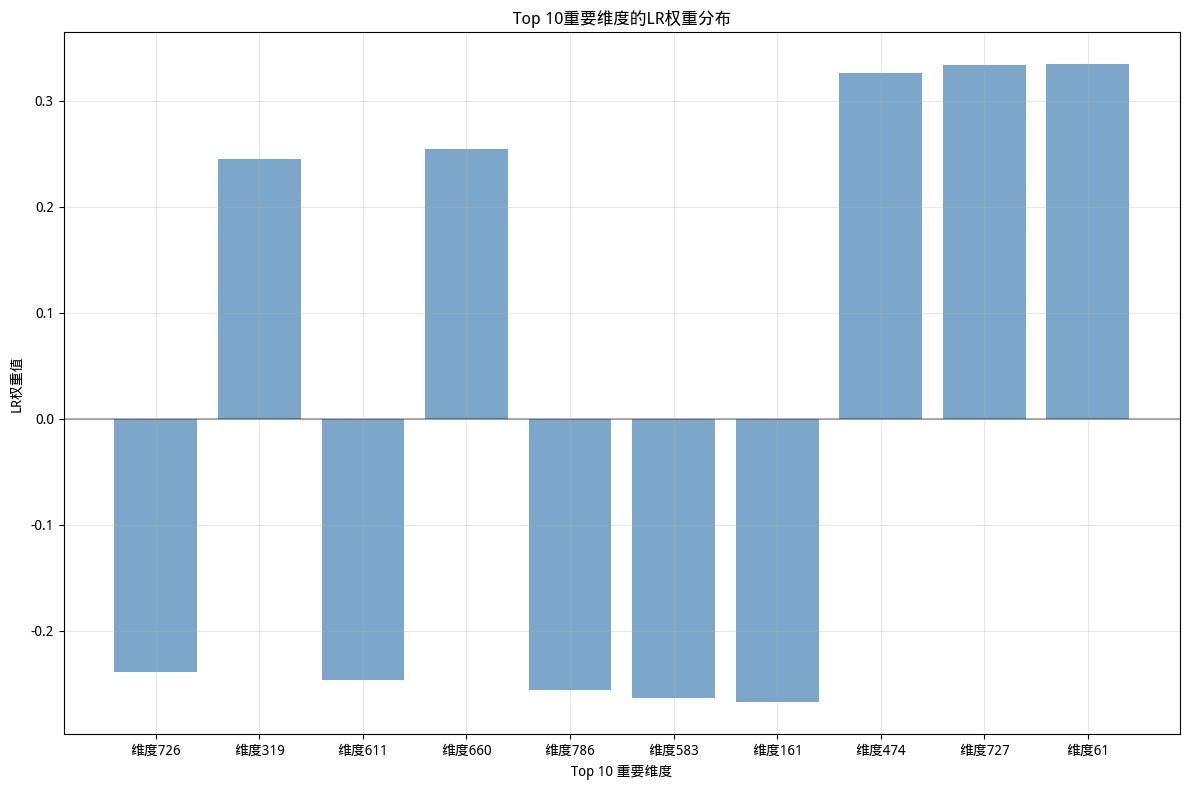


🎨 权重可视化完成！
✅ 二分类情感分析（正面 vs 负面）训练完成


In [3]:

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei']  # 例如，设置为黑体，适用于中文
plt.rcParams['axes.unicode_minus'] = False    # 正确显示负号

# --- 4. 权重分析 ---
print("\n=== 权重分析 ===")

# 获取逻辑回归的权重矩阵
coefficients = clf.coef_
print(f"权重矩阵形状: {coefficients.shape}")
print(f"特征维度数: {coefficients.shape[1]}")
print(f"类别数: {coefficients.shape[0]}")

# 计算每个维度的重要性（权重绝对值）
feature_importance = np.abs(coefficients[0])
print(f"特征维度数: {coefficients.shape[1]}")
print(f"最重要维度重要性: {np.max(feature_importance):.3f}")

# 找出Top 10权重贡献最大的维度（按绝对值排序）
top_10_indices = np.argsort(feature_importance)[-10:]
print(f"\nTop 10 权重贡献维度（按绝对值排序）:")
for i, idx in enumerate(reversed(top_10_indices)):
    actual_weight = coefficients[0][idx]
    print(f"  维度 {idx}: {actual_weight:.3f}")

# 可视化Top 10重要维度的LR权重
top_10_indices = np.argsort(feature_importance)[-10:]

plt.figure(figsize=(12, 8))
weights_top10 = coefficients[0][top_10_indices]  # 二分类只有一个权重向量

# 统一颜色显示权重
plt.bar(range(len(top_10_indices)), weights_top10, color='steelblue', alpha=0.7)

plt.xlabel('Top 10 重要维度')
plt.ylabel('LR权重值')
plt.title('Top 10重要维度的LR权重分布')
plt.xticks(range(len(top_10_indices)), [f'维度{idx}' for idx in top_10_indices])
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎨 权重可视化完成！")
print("✅ 二分类情感分析（正面 vs 负面）训练完成") 


In [5]:

# 7. 预测函数
def predict_sentiment(text):
    """预测单条文本的情感倾向"""
    embedding = model.encode([text], batch_size=1)
    proba = clf.predict_proba(embedding)[0]
    prediction = clf.predict(embedding)[0]
    
    sentiment = "正面" if prediction == 1 else "负面"
    print(f"\n文本: '{text}'")
    print(f"预测情感: {sentiment} (置信度: {max(proba):.2%})")
    print(f"正面概率: {proba[1]:.2%} | 负面概率: {proba[0]:.2%}")



# 测试自定义评论
print("\n自定义评论测试:")
test_reviews = [
    "这部电影完美平衡了艺术性和娱乐性，堪称经典之作。",
    "特效虽然华丽但剧情空洞，人物塑造单薄无力。",
    "中规中矩的作品，有些亮点但整体平淡无奇。",
    "前半小时精彩绝伦，可惜后面逐渐崩坏。",
    "被严重低估的杰作，多年后定会被重新认识。"
]

for review in test_reviews:
    predict_sentiment(review)



自定义评论测试:

文本: '这部电影完美平衡了艺术性和娱乐性，堪称经典之作。'
预测情感: 正面 (置信度: 71.54%)
正面概率: 71.54% | 负面概率: 28.46%

文本: '特效虽然华丽但剧情空洞，人物塑造单薄无力。'
预测情感: 负面 (置信度: 70.04%)
正面概率: 29.96% | 负面概率: 70.04%

文本: '中规中矩的作品，有些亮点但整体平淡无奇。'
预测情感: 负面 (置信度: 58.21%)
正面概率: 41.79% | 负面概率: 58.21%

文本: '前半小时精彩绝伦，可惜后面逐渐崩坏。'
预测情感: 负面 (置信度: 62.82%)
正面概率: 37.18% | 负面概率: 62.82%

文本: '被严重低估的杰作，多年后定会被重新认识。'
预测情感: 正面 (置信度: 60.30%)
正面概率: 60.30% | 负面概率: 39.70%
